## DQN sobre ambientes de Classic Control

https://gymnasium.farama.org/environments/classic_control/

### Imports

In [37]:
import torch
import numpy as np
import random
import numpy as np
import gymnasium

### Seteamos los devices

In [38]:
DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(f"Running on {DEVICE}")
print("Cuda Available:", torch.cuda.is_available())

Running on cuda:0
Cuda Available: True


### Seteo de seeds
Siempre es buena práctica hacer el seteo de seeds para la reproducibilidad de los experimentos

In [39]:
random.seed(42)
np.random.seed(42)
torch.manual_seed(42)
torch.backends.cudnn.deterministic = True

### Creamos el ambiente y probamos algunas de sus funciones.

En este caso elegimos el CartPole pero pueden cambiarlo en la variable *ENV_NAME*.
El ambiente CartPole tiene la ventaja de que las recompensas son positivas y es mas fácil propagar estas hacia los estados iniciales. Mountain Car tiene como recompensa -1 por cada paso que damos y esta limitado a 200 pasos.

In [40]:
ENVS = ["MountainCar-v0", "CartPole-v1"]
ENV_NAME = ENVS[1]

env = gymnasium.make(ENV_NAME, render_mode="rgb_array")

print("Actions #",env.action_space)
print(env.observation_space.shape)
env.reset()
next_state, reward, terminated, truncated, info = env.step(action=0)

print(f"{next_state.shape},\n {reward},\n {terminated},\n {info}")

Actions # Discrete(2)
(4,)
(4,),
 1.0,
 False,
 {}


### Seteamos los hyperparámetros

In [41]:
def process_state(obs, device):
    return torch.tensor(obs, device=device).unsqueeze(0)

#Hiperparámetros de entrenamiento del agente DQN
TOTAL_STEPS = 1000000
EPISODES = 6000
STEPS = 200

EPSILON_INI = 1
EPSILON_MIN = 0.1
EPSILON_DECAY = .99999
EPISODE_BLOCK = 100
EPSILON_TIME = 100000

BATCH_SIZE = 1
BUFFER_SIZE = 100

GAMMA =1# 0.999
LEARNING_RATE = 1e-4

### Creamos el ambiente que vamos a estar usando para el entrenamiento

In [42]:
env = gymnasium.make(ENV_NAME)
input_dim = env.observation_space.shape[0]
output_dim = env.action_space.n

print(f"Input dim: {input_dim}, Output dim: {output_dim}")

Input dim: 4, Output dim: 2


In [43]:
from actor_critic_models import ActorModel, CriticModel
from actor_critic_agent import ActorCriticAgent

actor = ActorModel(input_dim, output_dim).to(DEVICE)
critic = CriticModel(input_dim).to(DEVICE)

agent = ActorCriticAgent(env, actor, process_state, BUFFER_SIZE, BATCH_SIZE, 
                LEARNING_RATE, GAMMA, epsilon_i= EPSILON_INI, 
                epsilon_f=EPSILON_MIN, epsilon_anneal_time=EPSILON_TIME,
                epsilon_decay = EPSILON_DECAY, episode_block = EPISODE_BLOCK, device=DEVICE, critic_model=critic)

In [44]:
# from dqn_model import DQN_Model
# from dqn_agent import DQNAgent
# net = DQN_Model(input_dim, output_dim).to(DEVICE)

# agent = DQNAgent(env, net, process_state, BUFFER_SIZE, BATCH_SIZE, 
#                 LEARNING_RATE, GAMMA, epsilon_i= EPSILON_INI, 
#                 epsilon_f=EPSILON_MIN, epsilon_anneal_time=EPSILON_TIME,
#                 epsilon_decay = EPSILON_DECAY, episode_block = EPISODE_BLOCK, device=DEVICE, second_model_update=50)

In [45]:
rewards = agent.train(EPISODES, STEPS, TOTAL_STEPS, writer_name = ENV_NAME)

  0%|          | 6/6000 [00:00<01:41, 58.82 episodes/s]

Episode 0 - Avg. Reward over the last 100 episodes 16.0 epsilon 0.9998650101244944 total steps 16


  2%|▏         | 112/6000 [00:02<01:44, 56.42 episodes/s]

Episode 100 - Avg. Reward over the last 100 episodes 22.11 epsilon 0.9801873330866654 total steps 2227


  3%|▎         | 208/6000 [00:03<01:46, 54.27 episodes/s]

Episode 200 - Avg. Reward over the last 100 episodes 23.34 epsilon 0.9598816498504008 total steps 4561


  5%|▌         | 307/6000 [00:05<01:55, 49.26 episodes/s]

Episode 300 - Avg. Reward over the last 100 episodes 20.53 epsilon 0.9424082576705551 total steps 6614


  7%|▋         | 409/6000 [00:07<01:31, 61.32 episodes/s]

Episode 400 - Avg. Reward over the last 100 episodes 21.11 epsilon 0.9248114075758773 total steps 8725


  8%|▊         | 507/6000 [00:09<01:40, 54.88 episodes/s]

Episode 500 - Avg. Reward over the last 100 episodes 19.63 epsilon 0.9087782400289921 total steps 10688


 10%|█         | 607/6000 [00:11<01:38, 54.60 episodes/s]

Episode 600 - Avg. Reward over the last 100 episodes 20.48 epsilon 0.8923829227758123 total steps 12736


 12%|█▏        | 708/6000 [00:13<01:32, 57.00 episodes/s]

Episode 700 - Avg. Reward over the last 100 episodes 20.62 epsilon 0.8762112894377552 total steps 14798


 13%|█▎        | 806/6000 [00:14<01:28, 58.46 episodes/s]

Episode 800 - Avg. Reward over the last 100 episodes 19.11 epsilon 0.861518726269022 total steps 16709


 15%|█▌        | 911/6000 [00:16<01:31, 55.55 episodes/s]

Episode 900 - Avg. Reward over the last 100 episodes 17.62 epsilon 0.8482182872872718 total steps 18471


 17%|█▋        | 1012/6000 [00:18<01:24, 58.74 episodes/s]

Episode 1000 - Avg. Reward over the last 100 episodes 18.39 epsilon 0.8345843017214173 total steps 20310


 18%|█▊        | 1106/6000 [00:19<01:27, 56.16 episodes/s]

Episode 1100 - Avg. Reward over the last 100 episodes 18.76 epsilon 0.8209319595857799 total steps 22186


 20%|██        | 1213/6000 [00:21<01:17, 62.02 episodes/s]

Episode 1200 - Avg. Reward over the last 100 episodes 18.17 epsilon 0.8079509158007643 total steps 24003


 22%|██▏       | 1313/6000 [00:23<01:14, 62.99 episodes/s]

Episode 1300 - Avg. Reward over the last 100 episodes 17.4 epsilon 0.795739120586291 total steps 25743


 24%|██▎       | 1410/6000 [00:25<01:18, 58.67 episodes/s]

Episode 1400 - Avg. Reward over the last 100 episodes 17.54 epsilon 0.7836422560466624 total steps 27497


 25%|██▌       | 1510/6000 [00:26<01:17, 58.28 episodes/s]

Episode 1500 - Avg. Reward over the last 100 episodes 17.5 epsilon 0.7717825912994207 total steps 29247


 27%|██▋       | 1606/6000 [00:28<01:13, 60.17 episodes/s]

Episode 1600 - Avg. Reward over the last 100 episodes 16.42 epsilon 0.7608419893054106 total steps 30889


 29%|██▊       | 1713/6000 [00:29<01:03, 67.61 episodes/s]

Episode 1700 - Avg. Reward over the last 100 episodes 15.54 epsilon 0.7506518869547667 total steps 32443


 30%|███       | 1816/6000 [00:31<01:02, 67.43 episodes/s]

Episode 1800 - Avg. Reward over the last 100 episodes 16.99 epsilon 0.7396906904303354 total steps 34142


 32%|███▏      | 1913/6000 [00:32<01:03, 64.40 episodes/s]

Episode 1900 - Avg. Reward over the last 100 episodes 15.54 epsilon 0.7298267385118283 total steps 35696


 33%|███▎      | 2007/6000 [00:34<01:02, 63.49 episodes/s]

Episode 2000 - Avg. Reward over the last 100 episodes 16.55 epsilon 0.7194888876677613 total steps 37351


 35%|███▌      | 2118/6000 [00:36<00:52, 73.97 episodes/s]

Episode 2100 - Avg. Reward over the last 100 episodes 15.04 epsilon 0.7102414895451924 total steps 38855


 37%|███▋      | 2208/6000 [00:37<00:58, 64.42 episodes/s]

Episode 2200 - Avg. Reward over the last 100 episodes 15.37 epsilon 0.7009337907505993 total steps 40392


 39%|███▊      | 2311/6000 [00:39<00:54, 68.27 episodes/s]

Episode 2300 - Avg. Reward over the last 100 episodes 14.86 epsilon 0.6920699361684328 total steps 41878


 40%|████      | 2409/6000 [00:40<01:00, 59.11 episodes/s]

Episode 2400 - Avg. Reward over the last 100 episodes 16.9 epsilon 0.6821480304986404 total steps 43568


 42%|████▏     | 2507/6000 [00:42<01:00, 58.13 episodes/s]

Episode 2500 - Avg. Reward over the last 100 episodes 17.37 epsilon 0.6721234348698528 total steps 45305


 44%|████▎     | 2611/6000 [00:43<00:51, 65.61 episodes/s]

Episode 2600 - Avg. Reward over the last 100 episodes 15.28 epsilon 0.6634478391328723 total steps 46833


 45%|████▌     | 2710/6000 [00:45<00:45, 71.99 episodes/s]

Episode 2700 - Avg. Reward over the last 100 episodes 14.97 epsilon 0.6550758456989655 total steps 48330


 47%|████▋     | 2812/6000 [00:46<00:48, 65.18 episodes/s]

Episode 2800 - Avg. Reward over the last 100 episodes 14.28 epsilon 0.6472056892779536 total steps 49758


 49%|████▊     | 2915/6000 [00:48<00:42, 72.31 episodes/s]

Episode 2900 - Avg. Reward over the last 100 episodes 15.36 epsilon 0.6388648316644425 total steps 51294


 50%|█████     | 3010/6000 [00:49<00:41, 71.69 episodes/s]

Episode 3000 - Avg. Reward over the last 100 episodes 13.83 epsilon 0.6314636283315628 total steps 52677


 52%|█████▏    | 3113/6000 [00:51<00:43, 66.38 episodes/s]

Episode 3100 - Avg. Reward over the last 100 episodes 15.14 epsilon 0.6234778737015824 total steps 54191


 53%|█████▎    | 3209/6000 [00:52<00:42, 65.16 episodes/s]

Episode 3200 - Avg. Reward over the last 100 episodes 14.71 epsilon 0.6158338736361241 total steps 55662


 55%|█████▌    | 3312/6000 [00:54<00:41, 65.51 episodes/s]

Episode 3300 - Avg. Reward over the last 100 episodes 14.16 epsilon 0.6085811365481807 total steps 57078


 57%|█████▋    | 3415/6000 [00:55<00:35, 73.10 episodes/s]

Episode 3400 - Avg. Reward over the last 100 episodes 14.59 epsilon 0.60121480581958 total steps 58537


 58%|█████▊    | 3510/6000 [00:57<00:36, 67.99 episodes/s]

Episode 3500 - Avg. Reward over the last 100 episodes 13.97 epsilon 0.5942615167899947 total steps 59934


 60%|██████    | 3610/6000 [00:58<00:34, 69.82 episodes/s]

Episode 3600 - Avg. Reward over the last 100 episodes 14.1 epsilon 0.5873413313603584 total steps 61344


 62%|██████▏   | 3710/6000 [01:00<00:32, 71.27 episodes/s]

Episode 3700 - Avg. Reward over the last 100 episodes 15.07 epsilon 0.5800521593578641 total steps 62851


 63%|██████▎   | 3807/6000 [01:01<00:30, 72.45 episodes/s]

Episode 3800 - Avg. Reward over the last 100 episodes 13.28 epsilon 0.5737192105339314 total steps 64179


 65%|██████▌   | 3913/6000 [01:03<00:32, 63.95 episodes/s]

Episode 3900 - Avg. Reward over the last 100 episodes 14.49 epsilon 0.5669045109062953 total steps 65628


 67%|██████▋   | 4010/6000 [01:04<00:27, 72.83 episodes/s]

Episode 4000 - Avg. Reward over the last 100 episodes 13.71 epsilon 0.5605469308558008 total steps 66999


 69%|██████▊   | 4113/6000 [01:06<00:27, 69.29 episodes/s]

Episode 4100 - Avg. Reward over the last 100 episodes 13.38 epsilon 0.5544258542417592 total steps 68337


 70%|███████   | 4210/6000 [01:07<00:23, 75.02 episodes/s]

Episode 4200 - Avg. Reward over the last 100 episodes 13.23 epsilon 0.5484533951217294 total steps 69660


 72%|███████▏  | 4308/6000 [01:08<00:23, 71.57 episodes/s]

Episode 4300 - Avg. Reward over the last 100 episodes 13.37 epsilon 0.5424974772613955 total steps 70997


 74%|███████▎  | 4413/6000 [01:10<00:22, 70.28 episodes/s]

Episode 4400 - Avg. Reward over the last 100 episodes 13.35 epsilon 0.5366293925571848 total steps 72332


 75%|███████▌  | 4512/6000 [01:11<00:19, 74.51 episodes/s]

Episode 4500 - Avg. Reward over the last 100 episodes 13.45 epsilon 0.5307960444321314 total steps 73677


 77%|███████▋  | 4608/6000 [01:12<00:20, 68.23 episodes/s]

Episode 4600 - Avg. Reward over the last 100 episodes 13.03 epsilon 0.5252191841216027 total steps 74980


 79%|███████▊  | 4713/6000 [01:14<00:16, 76.45 episodes/s]

Episode 4700 - Avg. Reward over the last 100 episodes 13.42 epsilon 0.5195508621810471 total steps 76322


 80%|████████  | 4811/6000 [01:15<00:16, 73.11 episodes/s]

Episode 4800 - Avg. Reward over the last 100 episodes 13.03 epsilon 0.51411957611938 total steps 77625


 82%|████████▏ | 4912/6000 [01:17<00:16, 65.06 episodes/s]

Episode 4900 - Avg. Reward over the last 100 episodes 12.86 epsilon 0.5088280955158341 total steps 78911


 84%|████████▎ | 5010/6000 [01:18<00:13, 70.76 episodes/s]

Episode 5000 - Avg. Reward over the last 100 episodes 12.86 epsilon 0.5036042276709993 total steps 80197


 85%|████████▌ | 5109/6000 [01:19<00:12, 72.21 episodes/s]

Episode 5100 - Avg. Reward over the last 100 episodes 13.14 epsilon 0.4983355590790417 total steps 81511


 87%|████████▋ | 5212/6000 [01:21<00:10, 78.60 episodes/s]

Episode 5200 - Avg. Reward over the last 100 episodes 12.08 epsilon 0.49355261268464834 total steps 82719


 88%|████████▊ | 5309/6000 [01:22<00:09, 71.12 episodes/s]

Episode 5300 - Avg. Reward over the last 100 episodes 13.29 epsilon 0.48835690044370883 total steps 84048


 90%|█████████ | 5413/6000 [01:24<00:07, 73.65 episodes/s]

Episode 5400 - Avg. Reward over the last 100 episodes 13.07 epsilon 0.4833141022273637 total steps 85355


 92%|█████████▏| 5516/6000 [01:25<00:06, 78.96 episodes/s]

Episode 5500 - Avg. Reward over the last 100 episodes 11.9 epsilon 0.4787796976278723 total steps 86545


 94%|█████████▎| 5614/6000 [01:26<00:05, 74.87 episodes/s]

Episode 5600 - Avg. Reward over the last 100 episodes 12.26 epsilon 0.47416420929025493 total steps 87771


 95%|█████████▌| 5707/6000 [01:27<00:04, 72.81 episodes/s]

Episode 5700 - Avg. Reward over the last 100 episodes 12.71 epsilon 0.46943867656565186 total steps 89042


 97%|█████████▋| 5812/6000 [01:29<00:02, 74.35 episodes/s]

Episode 5800 - Avg. Reward over the last 100 episodes 13.1 epsilon 0.4646305916184924 total steps 90352


 98%|█████████▊| 5910/6000 [01:30<00:01, 67.88 episodes/s]

Episode 5900 - Avg. Reward over the last 100 episodes 11.91 epsilon 0.46031359998713495 total steps 91543


100%|██████████| 6000/6000 [01:31<00:00, 65.30 episodes/s]

Episode 6000 - Avg. Reward over the last 100 episodes 12.62 epsilon 0.45584127095826477 total steps 92792


### Graficamos las recompensas obtenidas durante el entrenamiento 

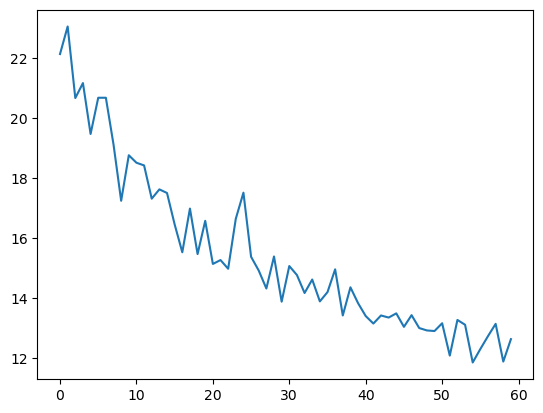

In [46]:
import matplotlib.pyplot as plt

average_range = EPISODE_BLOCK
episode_ticks = int(len(rewards) / average_range)

avg_rewards = np.array(rewards).reshape((episode_ticks, average_range))
avg_rewards = np.mean(avg_rewards, axis=1)

plt.plot(range(len(avg_rewards)), avg_rewards)

### Creamos un video para ver la performance del agente

In [47]:
import glob
from gymnasium.wrappers.record_video import RecordVideo
from IPython.display import HTML
from IPython import display as ipythondisplay
import io
import base64

def show_video():
  """
  Utility function to enable video recording of gym environment and displaying it
  To enable video, just do "env = wrap_env(env)""
  """
  mp4list = glob.glob('./videos/*.mp4')
  if len(mp4list) > 0:
    mp4 = mp4list[0]
    video = io.open(mp4, 'r+b').read()
    encoded = base64.b64encode(video)
    ipythondisplay.display(HTML(data='''<video alt="test" autoplay
                loop controls style="height: 400px;">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii'))))
  else:
    print("Could not find video")


def wrap_env(env):
  """
  Wrapper del ambiente donde definimos un Monitor que guarda la visualizacion como un archivo de video.
  """

  #env = Monitor(env, './video', force=True)
  env = RecordVideo(env,video_folder='./videos')
  return env

In [48]:
env = wrap_env(gymnasium.make(ENV_NAME, render_mode="rgb_array"))
observation,_ = env.reset()

while True:
    env.render()

    action = agent.select_action(process_state(observation, DEVICE), train=False)
    observation, reward, done, truncated, _ = env.step(action.item())

    if done or truncated:
      break

# Cerramos la conexion con el Monitor de ambiente y mostramos el video.
env.close()
show_video()

del env

Moviepy - Building video c:\Users\juan1\OneDrive\Desktop\letra\videos\rl-video-episode-0.mp4.
Moviepy - Writing video c:\Users\juan1\OneDrive\Desktop\letra\videos\rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\juan1\OneDrive\Desktop\letra\videos\rl-video-episode-0.mp4
